In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, time, re
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix

In [19]:
#paloalto01 = pd.read_csv('~/traf.csv', header=None, usecols=[1,7,8,23,25,29,30,31,32,33,34])
#paloalto01 = pd.read_csv('~/logs/traf.csv', header=None, na_filter= False)
paloalto01 = pd.read_csv('~/logs/traf.csv', header=None, usecols=[1,3,4,7,8,9,10,14,16,17,23,25,27,28,29,30,31,32,33,34,36,41,42,44,45,46,53])
paloalto01.columns = ['date', 'type','subtype','srcip', 'dstip', 'n-srcip','n-dstip','app','szone','dzone','r-count', 'dstport','n-dstport','flags', 'protocol', 'action', 'bytes', 'bsent', 'breceived', 'packets','e-time','sloc','dloc','psent','preceived','se-reason','asource']

In [87]:
paloalto01['e-time'].describe()

count    42007.000000
mean        18.651796
std        147.605988
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max      13758.000000
Name: e-time, dtype: float64

In [88]:
paloalto01['e-time'].head()

0    1
1    0
2    0
3    0
4    1
Name: e-time, dtype: int64

In [89]:
paloalto01['e-time'].value_counts()

0       24777
1        4088
3        1733
5         800
2         763
9         703
15        656
7         627
100       580
6         461
61        454
60        398
50        361
8         353
10        329
51        328
4         258
11        231
16        217
31        213
20        212
30        149
101       135
120       130
32        125
12         99
14         90
13         88
240        79
119        75
        ...  
3378        1
531         1
275         1
179         1
115         1
574         1
850         1
370         1
274         1
178         1
1329        1
529         1
497         1
209         1
894         1
1680        1
1264        1
688         1
560         1
528         1
432         1
208         1
1679        1
1231        1
847         1
751         1
623         1
495         1
367         1
639         1
Name: e-time, Length: 467, dtype: int64

In [21]:
paloalto01.iloc[:10,:10]

,date,type,subtype,srcip,dstip,n-srcip,n-dstip,app,szone,dzone
0,2018/06/08 22:00:43,TRAFFIC,start,172.17.7.242,82.222.167.141,213.74.176.163,82.222.167.141,sharepoint-base,trust,untrust
1,2018/06/08 22:00:43,TRAFFIC,drop,139.59.181.225,213.74.176.180,0.0.0.0,0.0.0.0,not-applicable,untrust,public
2,2018/06/08 22:00:43,TRAFFIC,start,172.17.7.242,178.210.173.32,213.74.176.163,178.210.173.32,web-browsing,trust,untrust
3,2018/06/08 22:00:43,TRAFFIC,end,195.142.90.225,213.74.176.178,0.0.0.0,0.0.0.0,radius,untrust,public
4,2018/06/08 22:00:43,TRAFFIC,end,172.17.6.80,207.46.194.33,213.74.176.163,207.46.194.33,ssl,trust,untrust
5,2018/06/08 22:00:43,TRAFFIC,end,192.168.7.169,172.17.7.20,0.0.0.0,0.0.0.0,insufficient-data,dmz,trust
6,2018/06/08 22:00:43,TRAFFIC,end,172.17.7.74,192.168.11.128,213.74.176.163,192.168.11.128,incomplete,trust,untrust
7,2018/06/08 22:00:43,TRAFFIC,end,172.17.6.80,207.46.194.33,213.74.176.163,207.46.194.33,ssl,trust,untrust
8,2018/06/08 22:00:44,TRAFFIC,drop,95.163.213.244,213.74.176.169,0.0.0.0,0.0.0.0,not-applicable,untrust,dmz
9,2018/06/08 22:00:44,TRAFFIC,deny,172.17.6.77,37.252.227.51,213.74.176.163,37.252.227.51,teamviewer-base,trust,untrust


In [38]:
def aciptoint(data):
    import ipaddress
    return int(ipaddress.IPv4Address(data))

paloalto01['srcip'] = paloalto01['srcip'].apply(aciptoint) 
paloalto01['dstip'] = paloalto01['dstip'].apply(aciptoint)

paloalto01['protocol'] = paloalto01.protocol.map({'tcp': 1, 'udp': 2, 'icpm': 3, 'ipv6': 4})
paloalto01['action'] = paloalto01.action.map({'allow': 1, 'deny': 2, 'reset-both': 3})


In [50]:
from sklearn.preprocessing import LabelEncoder

lb_loc = LabelEncoder()
paloalto01["sloc_inx"] = lb_loc.fit_transform(paloalto01["sloc"])
paloalto01[["sloc", "sloc_inx"]].head(11)

,sloc,sloc_inx
0,172.16.0.0-172.31.255.255,2
1,United Kingdom,66
2,172.16.0.0-172.31.255.255,2
3,Turkey,63
4,172.16.0.0-172.31.255.255,2
5,192.168.0.0-192.168.255.255,3
6,172.16.0.0-172.31.255.255,2
7,172.16.0.0-172.31.255.255,2
8,Russian Federation,50
9,172.16.0.0-172.31.255.255,2


In [56]:
paloalto01["dloc_inx"] = lb_loc.fit_transform(paloalto01["dloc"])
paloalto01[["dloc", "dloc_inx"]].head(11)

,dloc,dloc_inx
0,Turkey,33
1,Turkey,33
2,Turkey,33
3,Turkey,33
4,Ireland,15
5,172.16.0.0-172.31.255.255,2
6,192.168.0.0-192.168.255.255,3
7,Ireland,15
8,Turkey,33
9,Germany,11


In [61]:
paloalto01["app_inx"] = lb_loc.fit_transform(paloalto01["app"])
paloalto01[["app", "app_inx"]].head(11)

,app,app_inx
0,sharepoint-base,52
1,not-applicable,39
2,web-browsing,73
3,radius,50
4,ssl,61
5,insufficient-data,26
6,incomplete,24
7,ssl,61
8,not-applicable,39
9,teamviewer-base,65


In [73]:
paloalto01["flags_inx"] = lb_loc.fit_transform(paloalto01["flags"])
paloalto01[["flags", "flags_inx"]].head(11)

,flags,flags_inx
0,0x400000,17
1,0x0,0
2,0x400000,17
3,0x100050,6
4,0x400053,23
5,0x1c,16
6,0x400019,18
7,0x400053,23
8,0x0,0
9,0x400000,17


In [90]:
paloalto01["e-time_inx"] = lb_loc.fit_transform(paloalto01["e-time"])
paloalto01[["e-time", "e-time_inx"]].head(11)

,e-time,e-time_inx
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,1,1
8,0,0
9,0,0


In [94]:
corr = paloalto01.corr()

In [95]:
corr

,srcip,dstip,r-count,dstport,n-dstport,protocol,action,bytes,bsent,breceived,packets,e-time,psent,preceived,sloc_inx,dloc_inx,app_inx,flags_inx,e-time_inx
srcip,1.000000,-0.363044,-0.001377,0.012705,0.099230,0.218679,0.117218,0.005264,0.015354,-0.001759,0.002422,0.025274,0.003115,0.001562,-0.517235,-0.231232,-0.323034,-0.128921,0.077733
dstip,-0.363044,1.000000,0.010827,0.050724,0.000062,-0.389290,-0.096492,0.011392,0.012158,0.007513,0.010277,0.016112,0.010186,0.010191,0.514879,0.008219,0.247889,-0.086600,0.031544
r-count,-0.001377,0.010827,1.000000,-0.006924,-0.004706,NaN,-0.003342,-0.001237,-0.000775,-0.001109,-0.000709,-0.002613,-0.000610,-0.000813,-0.003899,0.011506,0.001014,0.007273,-0.006655
dstport,0.012705,0.050724,-0.006924,1.000000,0.558594,-0.092071,0.068605,-0.007996,0.002374,-0.011134,-0.005730,-0.026822,-0.004121,-0.007515,-0.191006,-0.480452,-0.137328,-0.090620,-0.070668
n-dstport,0.099230,0.000062,-0.004706,0.558594,1.000000,-0.031919,0.178705,-0.009530,-0.007542,-0.007697,-0.006292,-0.020613,-0.005637,-0.006944,-0.162674,-0.295036,-0.083542,0.039753,-0.051731
protocol,0.218679,-0.389290,NaN,-0.092071,-0.031919,1.000000,-0.034554,-0.024530,-0.015359,-0.021991,-0.015723,-0.030675,-0.013468,-0.018081,-0.155345,0.036383,-0.535650,-0.125877,-0.065568
action,0.117218,-0.096492,-0.003342,0.068605,0.178705,-0.034554,1.000000,-0.018106,-0.011062,-0.016379,-0.011187,-0.038171,-0.009680,-0.012751,-0.158266,-0.230341,0.132334,-0.117213,-0.097062
bytes,0.005264,0.011392,-0.001237,-0.007996,-0.009530,-0.024530,-0.018106,1.000000,0.610420,0.904914,0.817953,0.391303,0.758121,0.873006,-0.012556,-0.015679,0.040902,0.019450,0.190918
bsent,0.015354,0.012158,-0.000775,0.002374,-0.007542,-0.015359,-0.011062,0.610420,1.000000,0.215273,0.759081,0.306340,0.795682,0.701780,-0.018112,-0.041285,0.025408,0.005283,0.188618
breceived,-0.001759,0.007513,-0.001109,-0.011134,-0.007697,-0.021991,-0.016379,0.904914,0.215273,1.000000,0.600590,0.317837,0.507158,0.699254,-0.005748,0.002852,0.036776,0.021141,0.134035


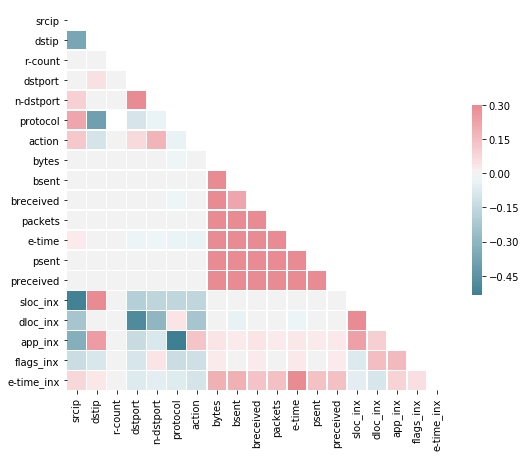

In [96]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(9, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

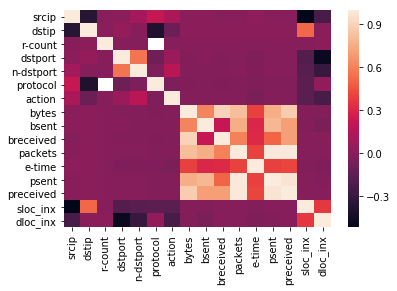

In [60]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [55]:
corr.columns

Index(['srcip', 'dstip', 'r-count', 'dstport', 'n-dstport', 'protocol',
       'action', 'bytes', 'bsent', 'breceived', 'packets', 'e-time', 'psent',
       'preceived', 'sloc_inx'],
      dtype='object')

In [107]:
#columns = ['srcip', 'dstip', 'app_inx', 'action', 'flags_inx', 'bytes', 'e-time_inx','sloc_inx','dloc_inx'] 
columns = ['app_inx', 'action', 'flags_inx','sloc_inx'] 
corr2 = paloalto01[columns].corr()
columns3 = ['app_inx', 'action', 'flags_inx','e-time_inx','srcip'] 
corr3 = paloalto01[columns3].corr()

In [101]:
corr2

,app_inx,action,flags_inx,sloc_inx
app_inx,1.000000,0.132334,0.161577,0.232690
action,0.132334,1.000000,-0.117213,-0.158266
flags_inx,0.161577,-0.117213,1.000000,-0.073345
sloc_inx,0.232690,-0.158266,-0.073345,1.000000


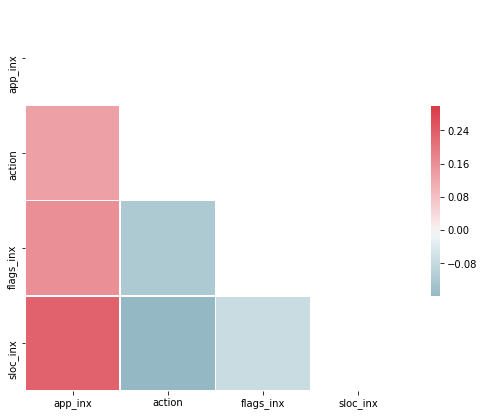

In [102]:
mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

f, ax = plt.subplots(figsize=(9, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr2, mask=mask2, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

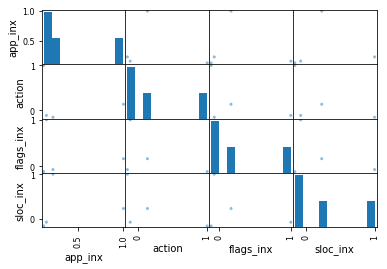

In [106]:
scatter_matrix(corr2)
plt.show()

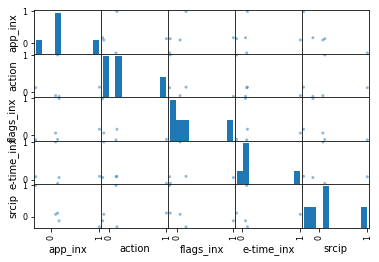

In [108]:
scatter_matrix(corr3)
plt.show()

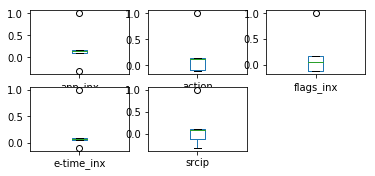

In [109]:
corr3.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()